In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt

(200, 2)

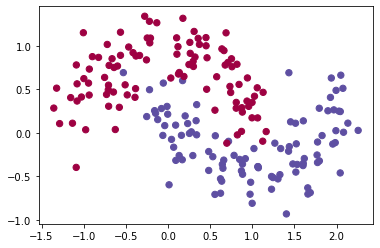

In [2]:



# 生成数据集并绘制出来
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
X.shape


In [3]:
num_examples = len(X) # 训练样本的数量
nn_input_dim = 2 # 输入层的维度
nn_output_dim = 2 # 输出层的维度
 
# 梯度下降的参数（我直接手动赋值）
epsilon = 0.01 # 梯度下降的学习率
reg_lambda = 0.01 # 正则化的强度

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
#帮助我们在数据集上估算总体损失的函数 
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    #正向传播，计算预测值
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = sigmoid(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # 计算损失
    corect_logprobs = -y.dot(np.log(probs[range(num_examples), y]))
    data_loss = np.sum(corect_logprobs)
    #在损失上加上正则项（可选）
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [6]:
# 预测输出（0或1）
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # 正向传播
    z1 = x.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [7]:
def build_model(nn_hdim, num_passes=20000, print_loss=False):
     
    # 用随机值初始化参数。我们需要学习这些参数
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim)
    b2 = np.zeros((1, nn_output_dim))
 
    # 这是我们最终要返回的数据
    model = {}
     
    # 梯度下降 
    for i in range(0, num_passes):
 
        # 正向传播
        z1 = X.dot(W1) + b1
        a1 = sigmoid(z1)
        z2 = a1.dot(W2) + b2
        #softmax
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # 反向传播
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (a1 -np.power(a1,2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # 添加正则项 (b1 和 b2 没有正则项)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # 梯度下降更新参数
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # 为模型分配新的参数
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        # 选择性地打印损失
        if print_loss and i % 1000 == 0:
          print ("Loss after iteration %i: %f" %(i, calculate_loss(model)))
          
    return model

In [8]:
# 抄的数据可视化

def plot_decision_boundary(pred_func):

    # 设定最大最小值，附加一点点边缘填充
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 用预测函数预测一下
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 然后画出图
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


Loss after iteration 0: 0.343574
Loss after iteration 1000: 0.101061
Loss after iteration 2000: 0.082020
Loss after iteration 3000: 0.078480
Loss after iteration 4000: 0.076705
Loss after iteration 5000: 0.075428
Loss after iteration 6000: 0.074422
Loss after iteration 7000: 0.073601
Loss after iteration 8000: 0.072914
Loss after iteration 9000: 0.072330
Loss after iteration 10000: 0.071826
Loss after iteration 11000: 0.071388
Loss after iteration 12000: 0.071005
Loss after iteration 13000: 0.070668
Loss after iteration 14000: 0.070371
Loss after iteration 15000: 0.070107
Loss after iteration 16000: 0.069874
Loss after iteration 17000: 0.069666
Loss after iteration 18000: 0.069480
Loss after iteration 19000: 0.069315
{'W1': array([[ 5.64255213, -6.28810105,  7.49476919],
       [ 4.93366462,  0.99536994, -1.35734083]]), 'b1': array([[-4.0801992 , -2.23939866, -9.06601879]]), 'W2': array([[ 7.82522081, -7.7171351 ],
       [ 5.7055238 , -5.66392865],
       [-7.82512201,  8.04140908]]),

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

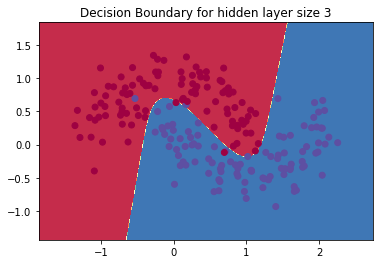

In [9]:
# 搭建一个3维隐藏层的模型
model = build_model(3, print_loss=True)
print(model)
# 画出决策边界
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")